## 라이브러리

### 기존

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

### 신규

In [2]:
#pip install missingno

In [3]:
#pip install fancyimpute

In [4]:
# 결측치 확인하는 라이브러리
import missingno as msno 

# 다중대체 라이브러리
from fancyimpute import IterativeImputer

# seaborn의 다른 라이브러리
import seaborn.objects as so

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

In [5]:
titanic = pd.read_csv('Titanic-Dataset.csv')
df=titanic.copy()

## 결측치

### 결측치 확인

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

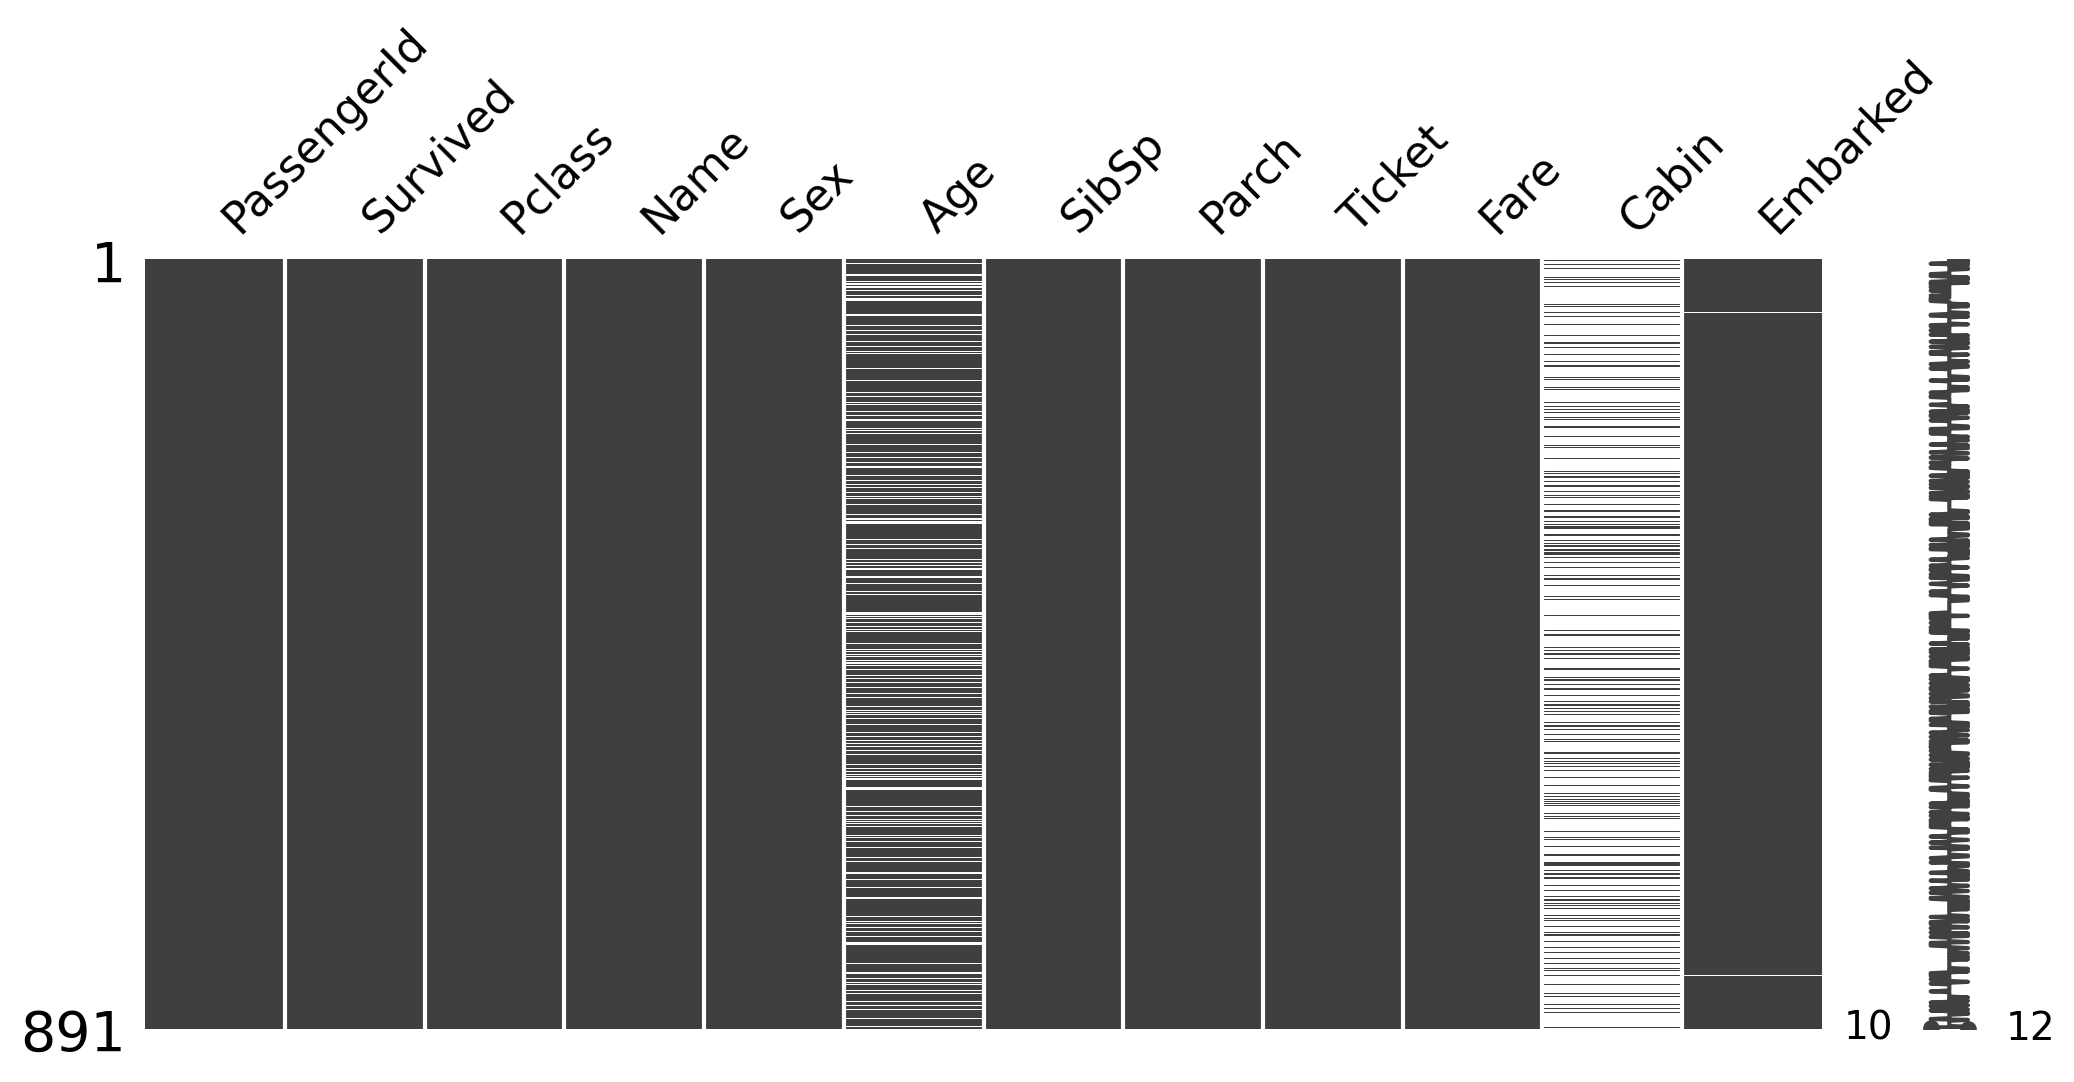

In [7]:
msno.matrix(df, figsize=(12,5))

### 결측치 처리

#### 제거

In [8]:
df.dropna(subset=['Embarked'])
#df.dropna(subset=['Embarked'], inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 대체 - 단일대체법

##### 평균, 중앙값, 최빈값

In [48]:
df2=df.copy()

In [10]:
print(f'평균: {round(df.Age.mean())}')
print(f'중앙값: {df.Age.median()}')
print(f'최빈값: {df.Age.mode()[0]}') # 최빈값의 경우 여러개일 경우 여러개를 반환하기 때문에 indexing이 필요함.

평균: 30
중앙값: 28.0
최빈값: 24.0


In [11]:
df2.Age=df.Age.fillna(round(df.Age.mean()))

In [12]:
print(f'대체 전: {df.Age.isna().sum()}')
print(f'대체 후: {df2.Age.isna().sum()}')

대체 전: 177
대체 후: 0


In [13]:
print(f'평균: {round(df2.Age.mean())}')
print(f'중앙값: {df2.Age.median()}')
print(f'최빈값: {df2.Age.mode()[0]}')

평균: 30
중앙값: 30.0
최빈값: 30.0


In [14]:
print(f'대체 전: {df.Age.std()}')
print(f'대체 후: {df2.Age.std()}')

대체 전: 14.526497332334042
대체 후: 13.002570039820952


##### 다른 변수의 그룹별 대표값

In [15]:
df2.Age=df.groupby(['SibSp', 'Parch'])['Age'].transform(lambda x: x.fillna(x.median()))

In [16]:
print(f'대체 전: {df.Age.isna().sum()}')
print(f'대체 후: {df2.Age.isna().sum()}')

대체 전: 177
대체 후: 7


In [17]:
df2.Age=df2.Age.fillna(round(df2.Age.mean()))

In [18]:
print(f'대체 후: {df2.Age.isna().sum()}')

대체 후: 0


In [19]:
print(f'평균: {round(df2.Age.mean())}')
print(f'중앙값: {df2.Age.median()}')
print(f'최빈값: {df2.Age.mode()[0]}')

평균: 30
중앙값: 29.5
최빈값: 29.5


In [20]:
print(f'대체 전: {df.Age.std()}')
print(f'대체 후: {df2.Age.std()}')

대체 전: 14.526497332334042
대체 후: 13.13800429431879


#### 대체 - 다중대체법

In [21]:
df._get_numeric_data().corr().Age.sort_values()

Pclass        -0.369226
SibSp         -0.308247
Parch         -0.189119
Survived      -0.077221
PassengerId    0.036847
Fare           0.096067
Age            1.000000
Name: Age, dtype: float64

In [22]:
imputer = IterativeImputer()
imputed_arr=imputer.fit_transform(df[['Pclass', 'SibSp', 'Parch', 'Age']])
df2.Age=pd.DataFrame(imputed_arr, columns=['Pclass', 'SibSp', 'Parch', 'Age']).Age.round()

In [23]:
print(f'대체 전: {df.Age.isna().sum()}')
print(f'대체 후: {df2.Age.isna().sum()}')

대체 전: 177
대체 후: 0


In [24]:
print(f'평균: {round(df2.Age.mean())}')
print(f'중앙값: {df2.Age.median()}')
print(f'최빈값: {df2.Age.mode()[0]}')

평균: 29
중앙값: 28.0
최빈값: 28.0


In [25]:
print(f'대체 전: {df.Age.std()}')
print(f'대체 후: {df2.Age.std()}')

대체 전: 14.526497332334042
대체 후: 13.594775913206208


In [26]:
# Cabin의 경우 객실번호로 알파벳 + 숫자 조합으로 구성
# 결측치를 대체한다면 ticket, Fare, Pclass, Embarked, 외부데이터를 활용할 수 있을 것
# 문자형이기 때문에 수치형으로 변환해줘야 가능

## 이상치

In [27]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

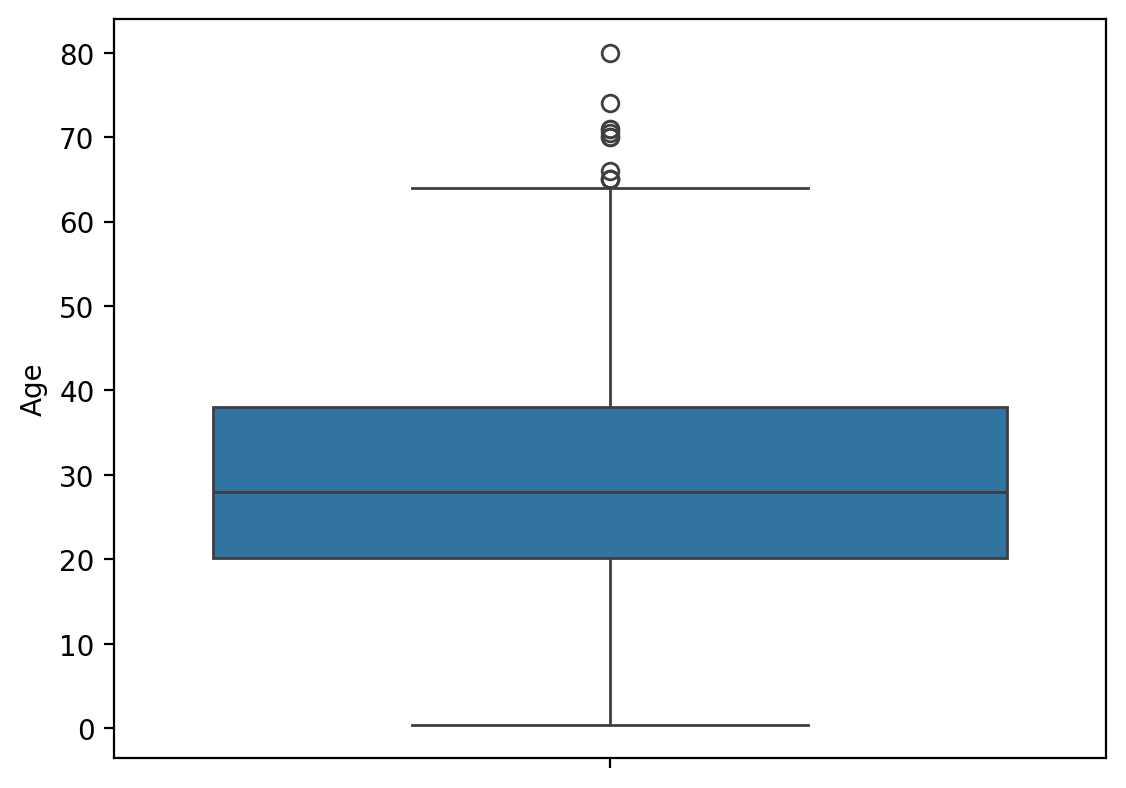

In [28]:
sns.boxplot(df.Age)

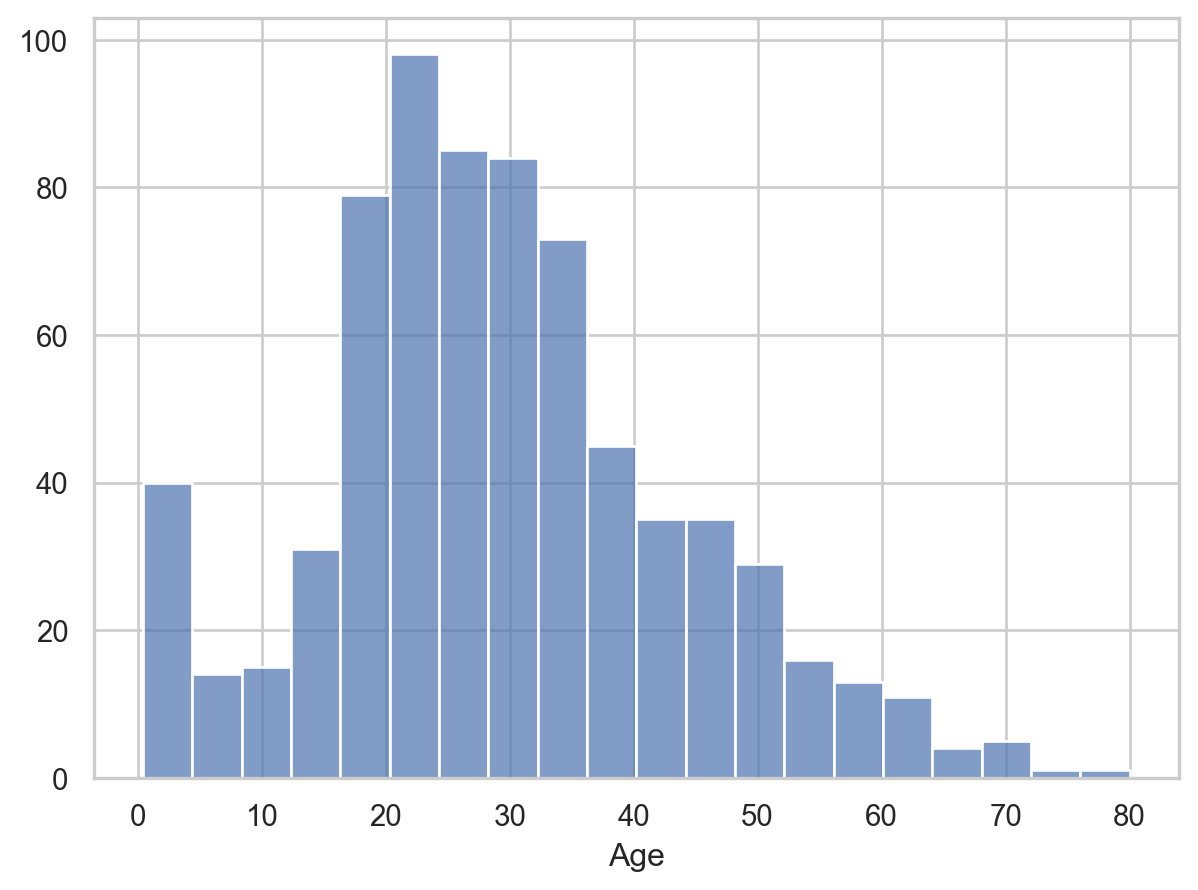

In [29]:
(
    so.Plot(df, x='Age')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

<Axes: ylabel='Age'>

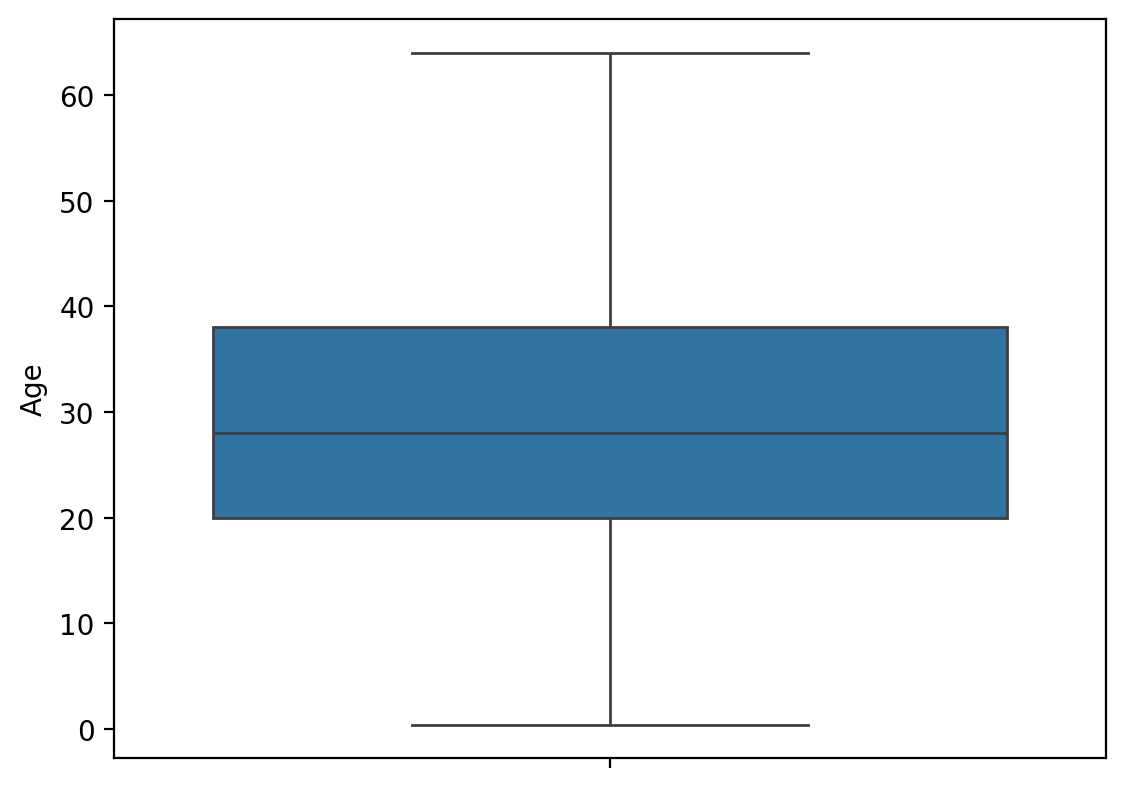

In [30]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2=df[(df.Age<upper_bound)&(df.Age>lower_bound)]
# 이상치 제거 확인
sns.boxplot(df2.Age)

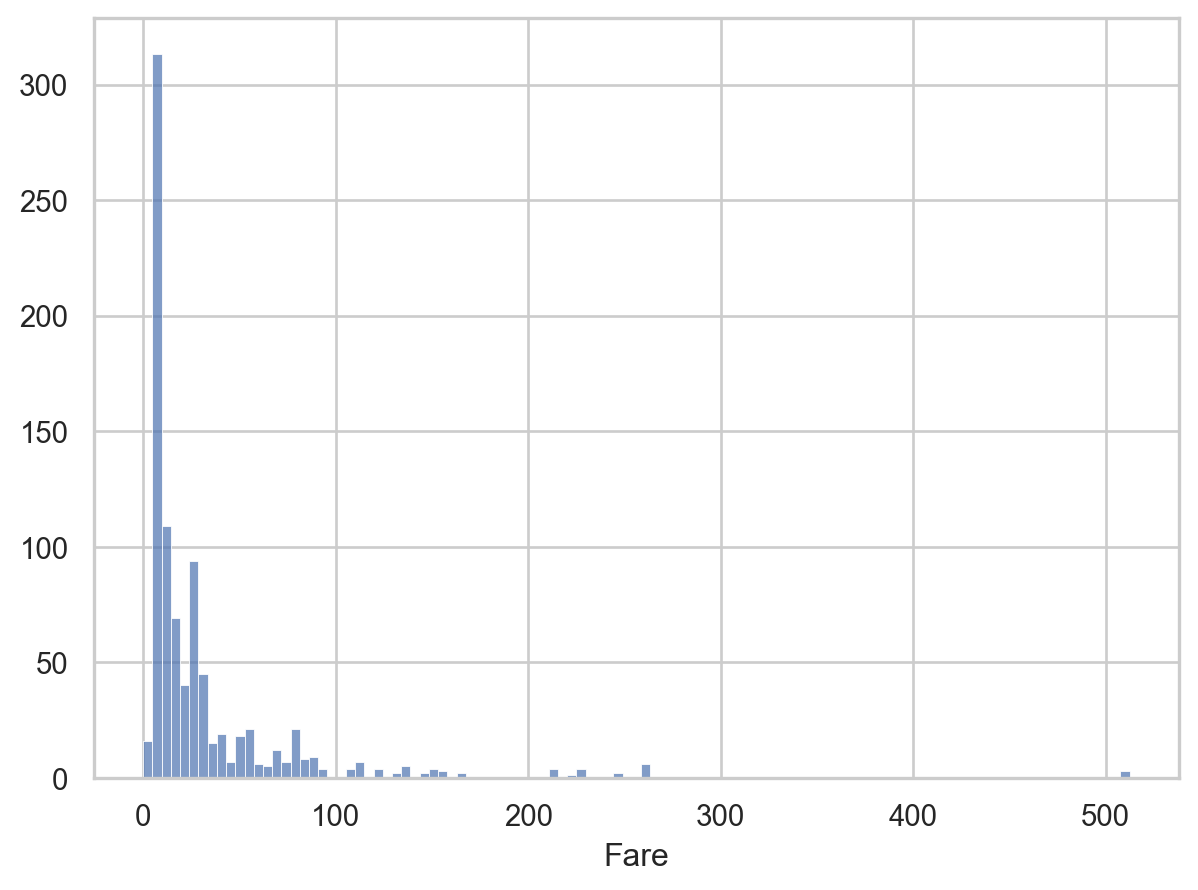

In [44]:
(
    so.Plot(df, x='Fare')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

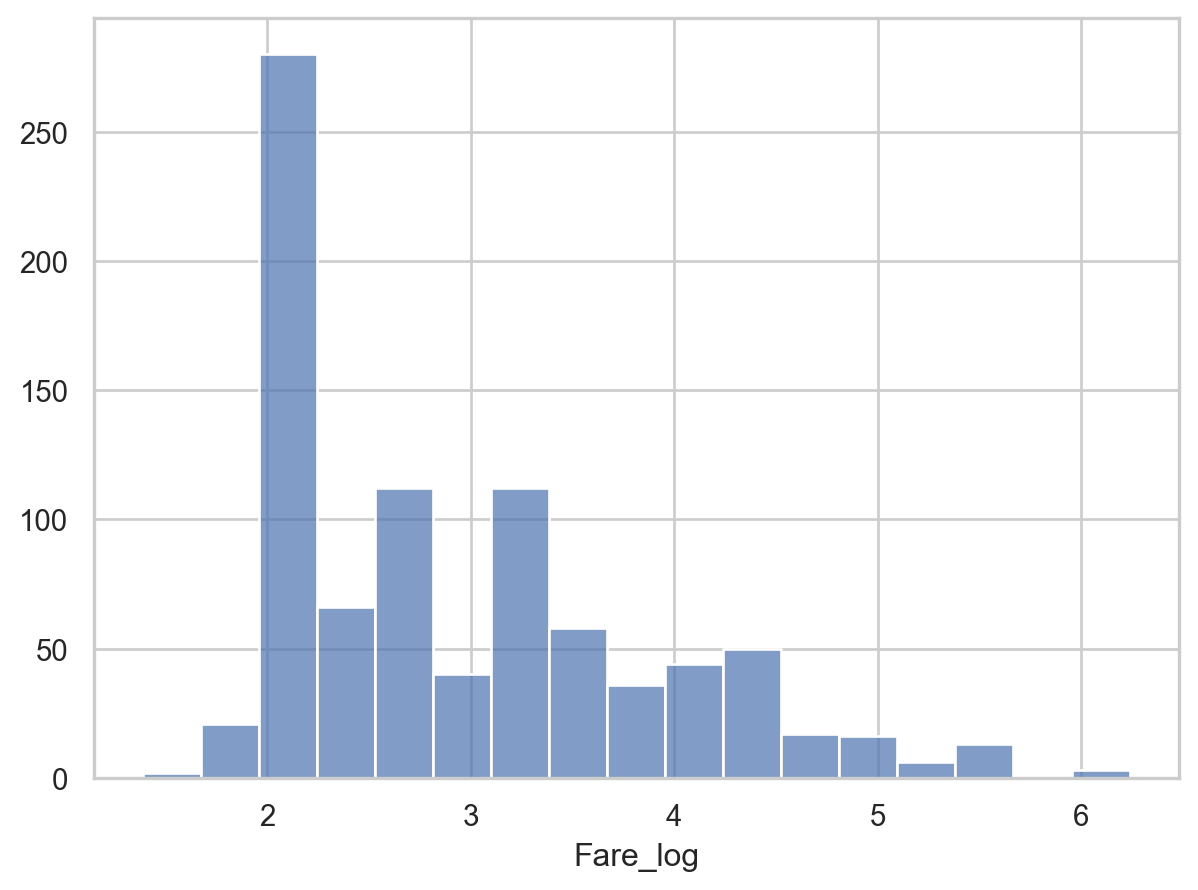

In [49]:
df2['Fare_log']=np.log(df2['Fare'])
(
    so.Plot(df2, x='Fare_log')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

In [31]:
# 나이에 소수점이 있다.
df.Age.unique()
# 방법 1: 소수점은 해당 나이라고 판단하여 내림한다.
# 방법 2: 0.xx 같은 경우는 소수점 뒷자리가 나이일 수도 있으니 100을 곱하고 나머지만 내림한다.

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [32]:
# 16살인데 부모자식수가 3인 경우가 존재
df.groupby('Age')['Parch'].max().sort_values(ascending=False).head(20)
# 가정 1: 부모뿐 아니라 조부모까지 더한 경우
# 가정 2: 부모가 3명
# 가정 3: 부모 2명에 자식 1명
# 가정 4: 이상치

Age
43.00    6
38.00    5
41.00    5
39.00    5
64.00    4
40.00    4
45.00    4
29.00    4
48.00    3
24.00    3
16.00    3
54.00    3
8.00     2
23.00    2
36.50    2
36.00    2
40.50    2
0.83     2
0.92     2
1.00     2
Name: Parch, dtype: int64

## 변수변환 & 파생변수

### 변수변환

- int: 정수형
- float: 실수형
- object: 문자형
- category: 범주형
- datetime: 날짜형

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df.Embarked=df.Embarked.astype('category')
df.Embarked.astype('category')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: category
Categories (3, object): ['C', 'Q', 'S']

In [35]:
df.Pclass=df.Pclass.astype('category')
df.Pclass.astype('category')

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: category
Categories (3, int64): [1, 2, 3]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(4), object(4)
memory usage: 71.7+ KB


In [37]:
data = {'Date': [20220101, 20220102, 20220103]}

df_date = pd.DataFrame(data)

df_date['Date_format'] = pd.to_datetime(df_date['Date'], format='%Y%m%d')

df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3 non-null      int64         
 1   Date_format  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 180.0 bytes


- Y: 네자리수 연도
- y: 두자리수 연도
- 영어는 따로 format 지정 안해도 알아서 바꿔줌 ex) 'April 04, 2022' -> '2022-04-04'

In [38]:
df_date['Date']

0    20220101
1    20220102
2    20220103
Name: Date, dtype: int64

In [39]:
df_date['Date_format'].dt.strftime('%Y%d')

0    202201
1    202202
2    202203
Name: Date_format, dtype: object

### 파생변수

In [40]:
# 가족 구성원 변수 - 가족 구성원이 많을 수록 생존에 유리 or 불리했을 수 있음. 또한 가족 구성원과 가장을 찾는다면 가장의 생존율도 확인 가능
# 변수를 새로 생성할 때는 .을 사용하지 못함
df2['family_size']=df.SibSp+df.Parch
df2.family_size

0      1
1      1
2      0
3      1
4      0
      ..
885    5
886    0
887    0
889    0
890    0
Name: family_size, Length: 703, dtype: int64

In [41]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

추가적인 아이디어
- 이름에서 성만 따와서 가족 단위를 찾을 수도 있음.
- ticket에서 규칙성을 찾을 수 있음.
- Cabin의 결측치를 대체했다면 알파벳 or 숫자만 따와서 층 or 선실의 위치를 구분 할 수도 있음.
- 나이대 별로 재 범주화 가능
- Pclass와 Fare를 통해 Cabin을 예측할 수도 있음.
- 당시 수온, 구조하러 온 시간, 객실에서 갑판까지 이동하는 평균 시간 등 외부 데이터를 활용 가능